In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc
from solver import solver, solver_density, energy_conservation
from collisions import scattering, s_annihilation, p_annihilation, annihilation_scattering, scattering_units
from collisions import equilibrium, density_equilibrium, random_distribution
from IntegralCheck import Lambda, collision_1D, collision_2D


# grid size  
x_start, x_end = 0.01, 50
y_start, y_end = 0.01, 50
y_gridpoints = 100

x_span = (x_start, x_end)
y_span = (y_start, y_end, y_gridpoints)

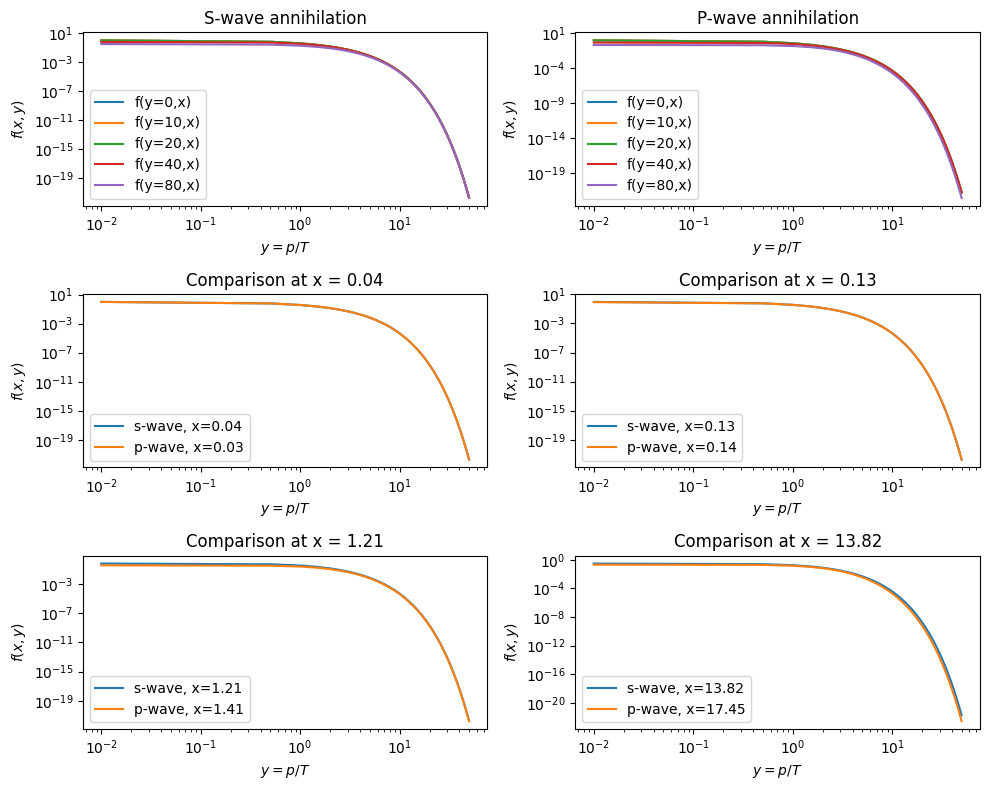

In [2]:
# solve for annihilation with initial condition = full thermal equilibrium
Gamma = 1
solv = solver(x_span,y_span,Gamma,equilibrium,s_annihilation)
xs0 = solv[0]
ys0 = solv[1]    
fs0 = solv[2]
# print(len(xs))

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
for n in [0,10,20,40,80]:
    axs[0,0].loglog(ys0,fs0[:,n],label=f"f(y={n},x)")
axs[0,0].set_xlabel(r"$y = p/T$")
axs[0,0].set_ylabel (r"$f(x,y)$")
axs[0,0].set_title("S-wave annihilation")
axs[0,0].legend()

solv = solver(x_span,y_span,Gamma,equilibrium,p_annihilation)
xs1 = solv[0]
ys1 = solv[1]    
fs1 = solv[2]
for n in [0,10,20,40,80]:
    axs[0,1].loglog(ys1,fs1[:,n],label=f"f(y={n},x)")
axs[0,1].set_xlabel(r"$y = p/T$")
axs[0,1].set_ylabel (r"$f(x,y)$")
axs[0,1].set_title("P-wave annihilation")
axs[0,1].legend()

indicies = [[10,20],[40,80]]

for i in range(1,3):
    for j in range(0,2):
        index = indicies[i-1][j]
        axs[i,j].loglog(ys0,fs0[:,index], label=f"s-wave, x={xs0[index]:0.2f}")
        axs[i,j].loglog(ys1,fs1[:,index+7], label=f"p-wave, x={xs1[index+7]:0.2f}")
        axs[i,j].set_title(f"Comparison at x = {xs0[index]:0.2f}")
        axs[i,j].set_xlabel(r"$y = p/T$")
        axs[i,j].set_ylabel (r"$f(x,y)$")
        axs[i,j].legend()

fig.tight_layout()

In [3]:
# y_span = (0.001,20,200)
# Gamma = 1
# y = [10,100]

# cons1 = energy_conservation(x_span,(0.001,y[0],100),Gamma,equilibrium,scattering,rtol=1e-6,atol=1e-6)
# cons2 = energy_conservation(x_span,(0.001,y[1],100),Gamma,equilibrium,scattering,rtol=1e-6,atol=1e-6)

# energy_cons = [cons1,cons2]

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# for i in [0,1]:
#     n_dot = energy_cons[i][0]
#     E_dot = energy_cons[i][1]
#     xs = energy_cons[i][2]
#     axs[0].plot(xs,energy_cons[i][0],label=f"grid size = {y[i]}")
#     axs[1].plot(xs,energy_cons[i][1], label=f"grid size = {y[i]}")
#     axs[i].set_xlabel(r"$x = m/T$")
# axs[0].set_title("Number density conservation for scattering")
# axs[0].set_ylabel(r"$\dot{n}$")
# axs[1].set_title("Energy conservation for scattering")
# axs[1].set_ylabel(r"$\dot{E}$")
# axs[0].legend()
# axs[1].legend()

# fig.tight_layout()

In [4]:
# solve for the number density for elastic scattering 
Gamma = 1
solv = solver_density(x_span,y_span,Gamma,density_equilibrium,scattering,rtol=1e-6,atol=1e-6)

xs = solv[0]
ys = solv[1]
ns = solv[2]

plt.plot(ys,ns[:,0])
plt.title("Number density for scattering")
plt.xlabel("x=m/T")
plt.ylabel("number density, n")


ValueError: unable to broadcast argument 1 to output array
File "/home/tobias/.local/lib/python3.10/site-packages/numba/np/arraymath.py", line 1, 